# Data Analysis for Behaviour Among Steam Users

## Dataset
* Dataset used in this analysis project is the Steam Video Games Dataset provided by Kaggle. 
* There are 5,000 games in the dataset, and about 200 thousand users in the dataset.
* For each user, we have a record for each game the user purchases and plays. And the "hour" attribute to track how many hours the game is played, purchasing behaviour count as 1.
* Data example is given below.
* In the project, only the top 15 is used to draw graphs, yet for a general analysis, all the games are taken into consideration.

## Import CSV file 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [2]:
from ipywidgets import interact
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure,output_file
from bokeh.models import LinearAxis, Range1d
output_notebook()

Loading BokehJS ...

In [3]:
df = pd.read_csv('../data/steam_dataset.csv', index_col=None, header=None)

In [4]:
df.columns = ['UserID', 'Game','Action','hours','Others']

In [5]:
df.head()

,UserID,Game,Action,hours,Others
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


In [6]:
df.index

RangeIndex(start=0, stop=200000, step=1)

## Drop zero elements column

it seems there are no values in 'Others' column, but need to test it 

In [7]:
test = [df.Others[i] for i in df.index if df.Others[i] != 0]

In [8]:
test

[]

In [9]:
df.drop('Others', axis=1, inplace=True)

## The number of game purchased/played

In [10]:
G_purchase = df.loc[df.Action == 'purchase']
G_play = df.loc[df.Action == 'play']

In [11]:
buy_n = G_purchase.Game.value_counts()
buy_df = pd.DataFrame(data = [buy_n.index, buy_n],index = ['Name','Counts']).T
play_n = G_play.Game.value_counts()
play_df = pd.DataFrame(data = [play_n.index, play_n],index = ['Name','Counts']).T

In [12]:
df.Action.value_counts()

purchase    129511
play         70489
Name: Action, dtype: int64

In [13]:
buy_df.shape[0]
play_df.shape[0]
print('Kinds of Game purchase   %s\nKinds of Game play       %s'%(buy_df.shape[0],play_df.shape[0]))

Kinds of Game purchase   5155
Kinds of Game play       3600


## Analysis
* Based on the data collected, combining the information of each individual player, the results show that:
* Total number of purchased games are 129511, but only 70489 of them are played.
* There are 5155 kinds of games purchased, only 3600 kinds of game are played.
* With a little extra maths, we can see that about 54.43% of the purchased games are actually played.
* And with all kinds of games purchased, only 69.84% of these types are played.

In [14]:
buy_15 = buy_df.iloc[0:15]
play_15 = play_df.iloc[0:15]

In [15]:
color = sns.color_palette('husl', 15)
sns.set_palette(color) 

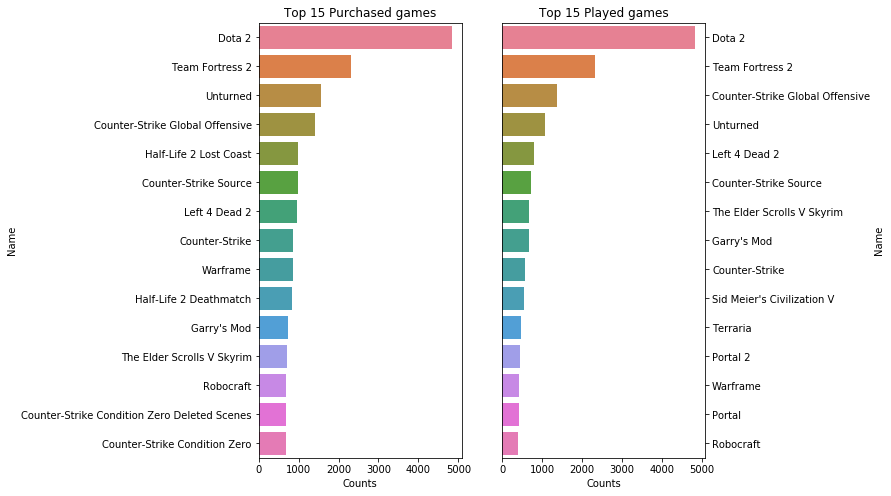

In [16]:
fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize = (8,8))
plt1 = sns.catplot(x = 'Counts',y = 'Name' , kind = "bar", data = buy_15, ax = axes[0])
plt2 = sns.catplot(x = 'Counts',y = 'Name' , kind = "bar", data = play_15, ax = axes[1])
axes[0].set_title("Top 15 Purchased games")
axes[1].set_title("Top 15 Played games")
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
plt.close(plt1.fig)
plt.close(plt2.fig)


## Analysis

* Above are the two graphs showing the top 15 games purchased and top 15 games played respectively. 
* Comparing the two list, we can see a quite difference in between; there are 5 games in the top purchased list, yet not in the top played, and there are 4 games in the top played list, yet not in the top purchased list.
* The top four gamese shows consistency in the purchased list and the played list. 
* Therefore, it is reasonable to assume that there are some users purchase a game but don't play it.
* Another interesting finding is that there are 5 "Counter-Strike" series game in the top purchased playlist, yet only 3 of them is in the top played list. I assume people would buy games based on its brand and series, even though the game may not be as good as they think it should be.
* The same assumption also apply to the game series "Half-Life", both games appeared in the top purchased list, and neither is in the top played list. 
* So far, we are only making assumptions based on the results, and now, it is time to dig deeper into the dataset and see some concrete results.

And it will be clear to show that if the index of play is sorted as purchase index

In [17]:
# set first columns as index
buy_index = buy_df.set_index(buy_df.columns[0])
b_15 = buy_index.iloc[0:15]

In [18]:
# set first columns as index
play_index = play_df.set_index(play_df.columns[0])

In [20]:
play_Wbuy_index = play_index.reindex(index = buy_index.index)
p_15 = play_Wbuy_index.iloc[0:15]

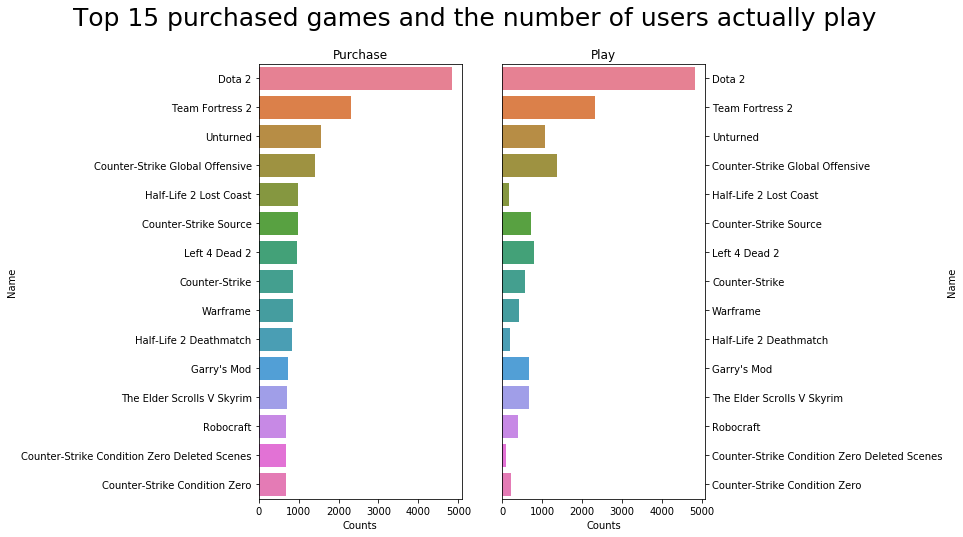

In [21]:
fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize = (8,8))
plt1 = sns.catplot(x = 'Counts',y = 'Name' , kind = "bar", data = buy_15, ax = axes[0])
plt2 = sns.catplot(x = 'Counts',y = p_15.index, kind = "bar", data = p_15,ax = axes[1])
axes[0].set_title("Purchase")
axes[1].set_title("Play")
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
fig.suptitle('Top 15 purchased games and the number of users actually play',fontsize = 25)
plt.close(plt1.fig)
plt.close(plt2.fig)

## Analysis
 * Combining the previous graphs, the list of number-of-users-play for each game is consistent with the top played list: the games that are in the top purchased list and not on the top played list shows significant shortage in users.
 * These are only the findings based on observation, now I will use concrete maths to prove the results.
So the following is to calculate the percentage of game purchased but not played

In [22]:
color1 = sns.color_palette('colorblind', 15)
sns.set_palette(color1) 

In [23]:
bp_percent = [(buy_index.iloc[i]-play_Wbuy_index.iloc[i])/buy_index.iloc[i]   for i in range (play_Wbuy_index.shape[0])]

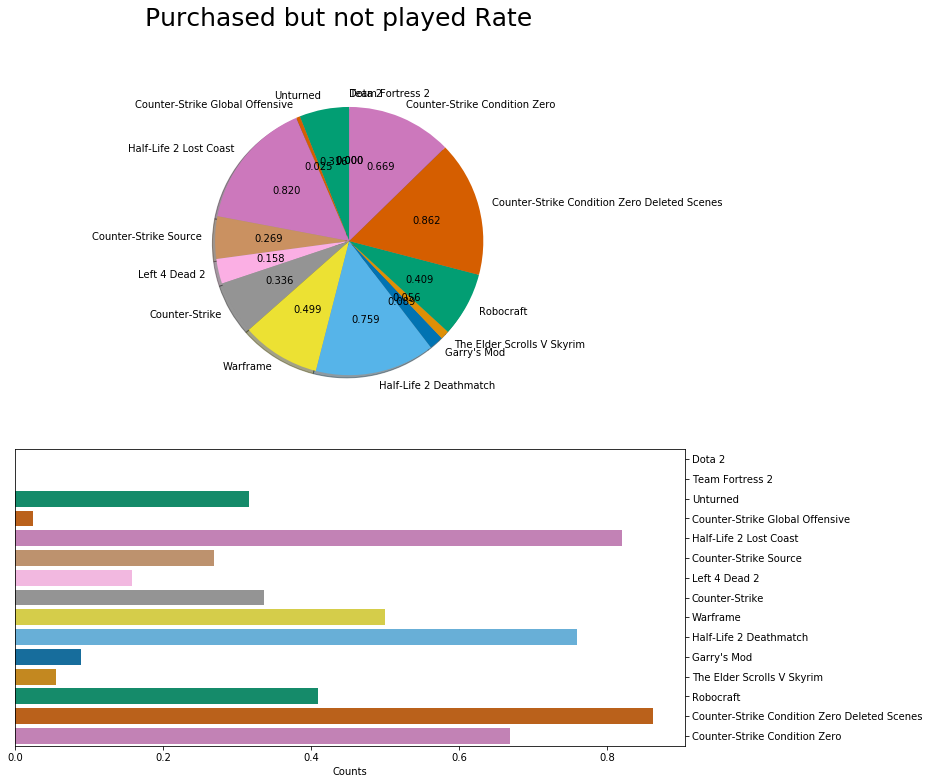

In [24]:
bp_df = pd.DataFrame(bp_percent)
fig, ax = plt.subplots(2,1,figsize =(12,12))
total = bp_df.iloc[0:15].Counts.sum()
ax[0].pie(bp_df.iloc[0:15].Counts,  labels = bp_df.index[0:15], 
          autopct=lambda p: '{:.3f}'.format(p * total / 100),
          shadow=True, startangle=90)
plt1 = sns.catplot(x = 'Counts',y = bp_df.index[0:15], kind = "bar", data = bp_df.iloc[0:15],ax = ax[1])
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[0].axis('equal')
fig.suptitle('Purchased but not played Rate',fontsize = 25)
plt.close(plt1.fig)

## Analysis

* Above graph shows the percentage of users who purchased a game yet not played the game.
* For the top 15 sale games, "Counter-Strike Condition Zero Deleted Scenes", "Half-Life 2 Lost Coast", "Half-Life 2 Deathmatch" have the highest Purchased but not played Rate which are 86.2%, 82.0%, 75.9%
* The results are consistent with the previous observation.

In [25]:
print('{} has highest Purchased but not played Rate in overall which is {}'.format(bp_df.idxmax()[0],bp_df.max()[0]),
      '\n\nThere are {} users bought this game, but only {} user play this game'.format(buy_index.loc[bp_df.idxmax()].Counts[0],
                                                                                   play_Wbuy_index.loc[bp_df.idxmax()].Counts[0]))

Psychonauts Demo has highest Purchased but not played Rate in overall which is 0.9878048780487805 

There are 82 users bought this game, but only 1 user play this game


In [26]:
Rate_15 = []
R_index = []
n = int(bp_df.shape[0]/15)
for i in range (n) :
    Rate_15.append(bp_df.iloc[i*15:(i+1)*15].mean())
    R_index.append('%s-%s'%(i*15,(i+1)*15))

In [27]:
Rate_df = pd.DataFrame(Rate_15, index = R_index)

Text(0,0.5,'Counts')

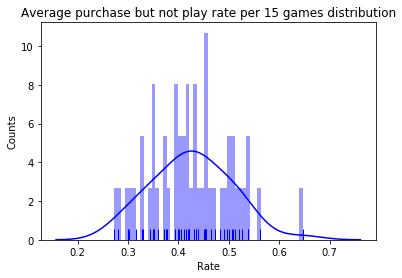

In [28]:
fig, ax = plt.subplots()
p1 = sns.distplot(Rate_df[0:50].Counts, color='b', bins=50, rug=True, kde=True)
ax.set_title('Average purchase but not play rate per 15 games distribution')
ax.set_xlabel('Rate')
ax.set_ylabel('Counts')

## Analysis
* Here, the graph shows the distribution of the purchase-not-play rate.
* For every 15 games as a sample batch, the sample rate is calcultaed. The majority of the rate is around 0.4.
* In other words, overall only 60% games steam users purchased are also played.

## The number of hours games played

In [29]:
G_play.head()

,UserID,Game,Action,hours
1,151603712,The Elder Scrolls V Skyrim,play,273.0
3,151603712,Fallout 4,play,87.0
5,151603712,Spore,play,14.9
7,151603712,Fallout New Vegas,play,12.1
9,151603712,Left 4 Dead 2,play,8.9


In [30]:
play_sum = G_play.groupby(['Game'], as_index=True).sum().sort_values('hours',ascending = False)
play_sum.drop('UserID', axis=1, inplace=True)

In [31]:
play_sum.head()

,hours
Game,
Dota 2,981684.6
Counter-Strike Global Offensive,322771.6
Team Fortress 2,173673.3
Counter-Strike,134261.1
Sid Meier's Civilization V,99821.3


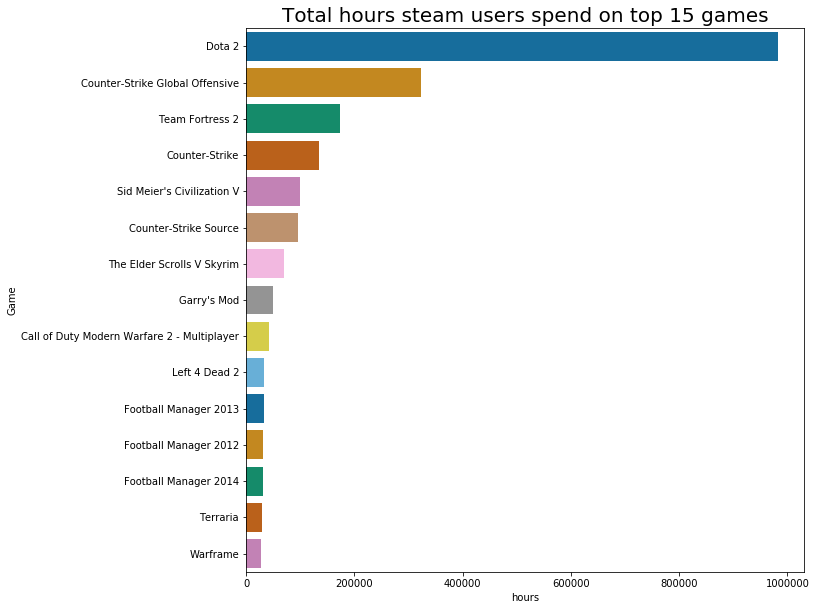

In [32]:
fig,ax = plt.subplots(figsize = (10,10))
p1 = sns.catplot(x = 'hours', y = play_sum.index[0:15], kind = 'bar', data = play_sum.iloc[0:15],ax = ax)
ax.set_title('Total hours steam users spend on top 15 games', fontsize = 20)
plt.close(p1.fig)

## Analysis
* Now we take the game as the primary key, and calulate the hours in total for each game was played.
* As above figure shown, steam users spend most their time on "Dota2", "Counter-Strike Global Offensive", "Team Fortress 2". 

The next step is to find the average hours they spend on those games 

In [33]:
play_mean = G_play.groupby(['Game'], as_index=True).mean().sort_values('hours',ascending = False)
play_mean.drop('UserID', axis=1, inplace=True)
play_mean_sort = play_mean.reindex(index = play_sum.index)  
play_mean_sort.head(5)

,hours
Game,
Dota 2,202.785499
Counter-Strike Global Offensive,234.402033
Team Fortress 2,74.762505
Counter-Strike,236.375176
Sid Meier's Civilization V,180.182852


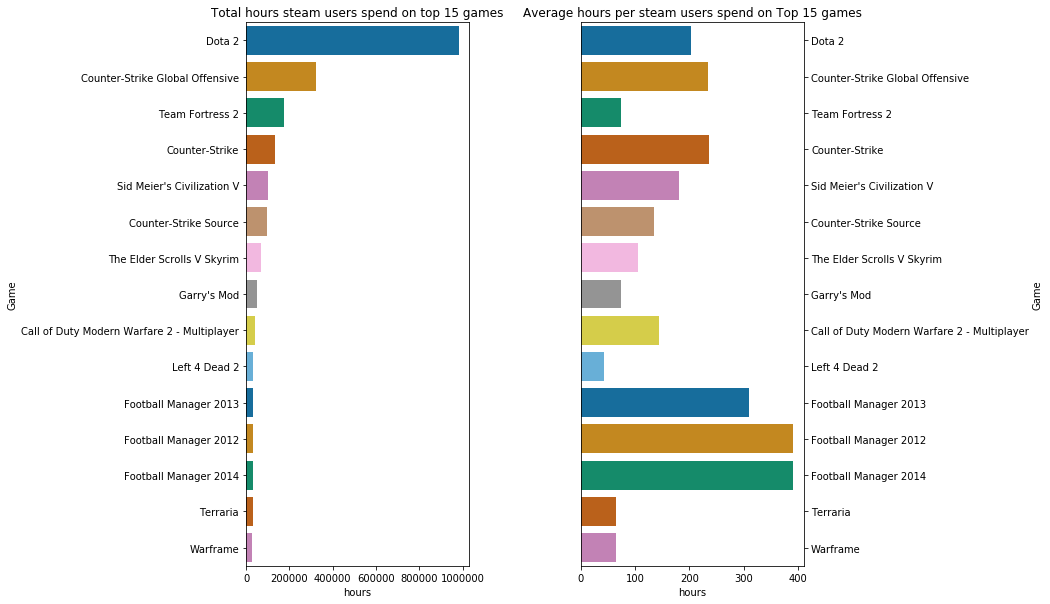

In [34]:
fig,ax = plt.subplots(1,2,figsize = (10,10))
p1 = sns.catplot(x = 'hours', y = play_sum.index[0:15], kind = 'bar', data = play_sum.iloc[0:15],ax = ax[0])
ax[0].set_title('Total hours steam users spend on top 15 games')
p2 = sns.catplot(x = 'hours', y = play_mean_sort.index[0:15], kind = 'bar', data = play_mean_sort.iloc[0:15],ax = ax[1])
ax[1].set_title('Average hours per steam users spend on Top 15 games')
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
fig.subplots_adjust(wspace = 0.5)
plt.close(p1.fig)
plt.close(p2.fig)

## Analysis
* From the figures shown above, although total hours spend on "Dota2" is most, the top three games that per steam users spend hours on are "Football Manager 2013", "Football Manager 2012", "Football Manager 2014". 
* This observation make sense in a way since the "Football manager" game series is not in the list for most purchased nor most played.
Next step is to show the distribution of hours spend on top 15 play games via boxplot

In [35]:
box_index = play_sum.index[0:15]

In [36]:
mask = G_play['Game'].isin(box_index)
G_box = G_play.loc[mask]
G_box.head()

,UserID,Game,Action,hours
1,151603712,The Elder Scrolls V Skyrim,play,273.0
9,151603712,Left 4 Dead 2,play,8.9
19,151603712,Team Fortress 2,play,2.8
43,151603712,Dota 2,play,0.5
49,151603712,Garry's Mod,play,0.1


In [37]:
G_dota2 = G_play[G_play['Game'] == 'Dota 2']
G_FM13 = G_play[G_play['Game'] == 'Football Manager 2013']
G_append = G_dota2.append(G_FM13)

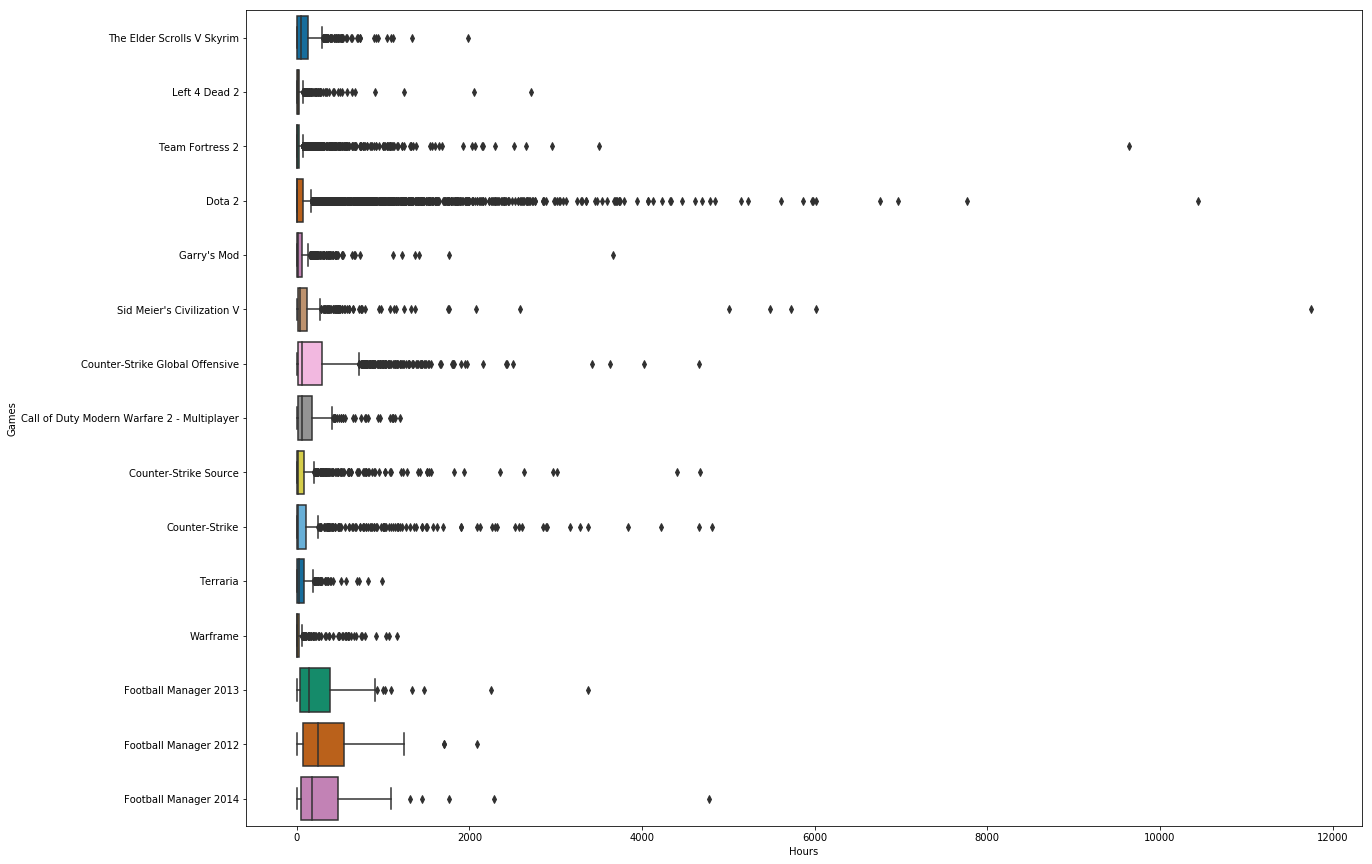

In [38]:
# Boxplot
fig , ax = plt.subplots(figsize = (20,15))
p1 = sns.boxplot(x = 'hours' , y='Game', data = G_box)
ax.set_xlabel('Hours')
ax.set_ylabel('Games');

## Analysis
* Above sandbox graph gives us more insight into the situation, since it shows the variance and the average playing time of each game.
* Most users playing the "Football Manager" series spend time in a particular range, and only a few people spend more time than the majority of users.
* While "Dota2" on the other hand, have the most number of users playing more than majority, in a way, we can say that "Dota2" has the largest group of raving fans. And these fans contribute a lot to the total hours of playing. 
* Though the "Football Manager" series is not on the list for most-purchased and most-played, yet it is in the list for average hour each user played list. We can say that most user played it spend the same significant amount of time on it.
* As for "Dota2" since it has the largest number of user purchased, and not every user is commited to this game, therefore, it is reasonable for "Dota2" not on the top in the average hour each user spent list.

In [39]:
test_play = G_play.groupby(['UserID'],as_index=False).count()[['UserID','Game']]
test_buy = G_purchase.groupby(['UserID'],as_index=False).count()[['UserID','Game']]
test_hours = G_purchase.groupby(['UserID'],as_index=False).count()[['UserID','Game']]

In [40]:
p = figure( plot_height=500, plot_width=800, x_axis_type = 'datetime',y_range =(0,1200))


p.xaxis.axis_label = 'UserID'
p.yaxis.axis_label = 'Counts'

s = p.line(test_hours['UserID'],test_hours['Game'], color="yellow", line_width=3,legend = 'play-hours')



p.extra_y_ranges = {"play": Range1d(start= 0, end = 1300)}

p.add_layout(LinearAxis(y_range_name="play"), 'right')
r = p.line(test_buy['UserID'],test_buy['Game'], color="#2222aa", line_width=3,y_range_name="play",legend = 'buy-counts')



t = p.line(test_play['UserID'],test_play['Game'], color="red", line_width=3,y_range_name="play",legend = 'play-counts')
#output_file('Counts.html', mode='cdn')

show(p, notebook_handle=True)

## Analysis
* For the above bar graph, we can see that most users have a buy-counts greater than play-counts, which means most of users have purchased games that they never plays
* For most users the total time they play and the number of game they purchase doesn't different dramatically, which means most users are not committed into one particular game.

## Conclusion
* In this project, techniques including seaborn and bokeh is used for ploting and scipy.stats is applied for data analysis.
* Based on the previous analysis regarding the Steam Video Games Dataset, I have these conclusions:
* There are users purchase some games and yet never play that game.
* Most users tend to play a variety of games, instead of playing only one game.
* Some games might have good commerical effect to make a lot of users make a purchase, yet after purchasing, users never play. E.g: "Half Life 2" series.
* Some games might not have popularity among the majority of users, yet users playing those games are committed. E.g: the "Football Manager" series.
* Some games have a large fan base, and may have a relatively large group of raving fans spend more time than average users. E.g: "Dota2".